### Installing all the libraries

In [84]:
!pip install seaborn

In [2]:
!pip install nltk

In [3]:
!pip install pandas

### Importing all the packages

In [1]:
from sklearn.model_selection import train_test_split
import nltk
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\muham\\OneDrive\\Desktop\\Spam FIlter\\Data\\spam.csv" , encoding='ISO-8859-10')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data = data.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'])

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)

In [20]:
data.sample(5)

,target,text,number_of_char
2894,ham,Went to ganesh dress shop,25
3436,ham,Then what about further plan?,29
3803,ham,"No dude, its not fake..my frnds got money, tht...",204
403,ham,None of that's happening til you get here though,48
1034,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,103


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
data['target'] = encoder.fit_transform(data['target'])

In [23]:
data.sample(5)

,target,text,number_of_char
3376,0,Yup. Wun believe wat? U really neva c e msg i ...,58
603,0,Be happy there. I will come after noon,38
335,0,"Ta-Daaaaa! I am home babe, are you still up ?",45
2193,0,I called but no one pick up e phone. I ask bot...,77
2662,1,Hello darling how are you today? I would love ...,130


In [24]:
data.isnull().sum()

target            0
text              0
number_of_char    0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data.drop_duplicates(keep='first' , inplace=True)

In [27]:
data.duplicated().sum()

0

### EDA

In [28]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [50]:
!pip install matplotlib

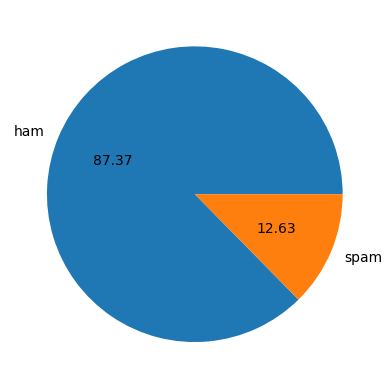

In [29]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts() , labels = ['ham' , 'spam'] , autopct = '%0.2f')
plt.show()

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
data['number_of_char'] = data['text'].apply(len)

In [31]:
data

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ė_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [32]:
data['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ė_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [33]:
data['token_words'] = data['text'].apply(lambda x:nltk.word_tokenize(x))

In [36]:
data

,target,text,number_of_char,token_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ė_ b going to esplanade fr home?,37,"[Will, Ė_, b, going, to, esplanade, fr, home, ?]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,..."


In [37]:
data['len_of_token_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
data

,target,text,number_of_char,token_words,len_of_token_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35
5568,0,Will Ė_ b going to esplanade fr home?,37,"[Will, Ė_, b, going, to, esplanade, fr, home, ?]",9
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27


In [39]:
data['num_of_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
data

,target,text,number_of_char,token_words,len_of_token_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4
5568,0,Will Ė_ b going to esplanade fr home?,37,"[Will, Ė_, b, going, to, esplanade, fr, home, ?]",9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1


In [64]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [71]:
import string
def processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return ' '.join(y)
    

In [72]:
processing('my name is hassan and i am a good boy?')

'name hassan good boy'

In [74]:
data['processed_text'] = data['text'].apply(processing)

In [75]:
data

,target,text,number_of_char,token_words,len_of_token_words,num_of_sent,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4,2nd time tri 2 contact u åģ750 pound prize 2 c...
5568,0,Will Ė_ b going to esplanade fr home?,37,"[Will, Ė_, b, going, to, esplanade, fr, home, ?]",9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1,guy bitch act like interest buy someth els nex...


In [79]:
spam_words = []
for words in  data[data['target'] == 1 ]['processed_text'].tolist():
    for msg in words.split():
        spam_words.append(msg)
        

In [80]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'åģ900',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',


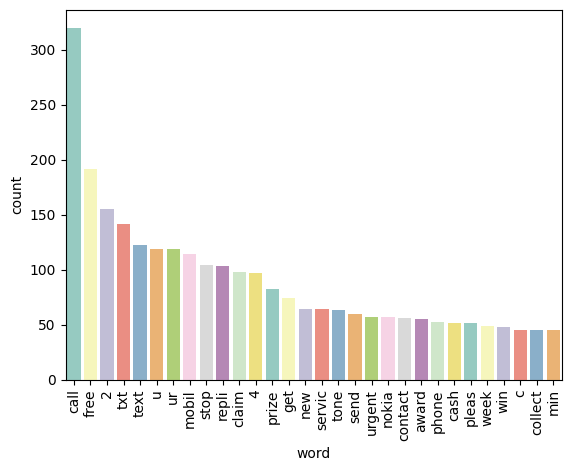

In [93]:
from collections import Counter
import seaborn as sns
word_counts = pd.DataFrame(Counter(spam_words).most_common(30), columns=['word', 'count'])
palette = sns.color_palette("Set3", n_colors=len(word_counts))  # Adjust n_colors for the number of words

# Create the bar plot
sns.barplot(x='word', y='count', hue='word', data=word_counts, palette=palette, legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
ham_words = []
for words in  data[data['target'] == 0 ]['processed_text'].tolist():
    for msg in words.split():
        ham_words.append(msg)

In [97]:
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

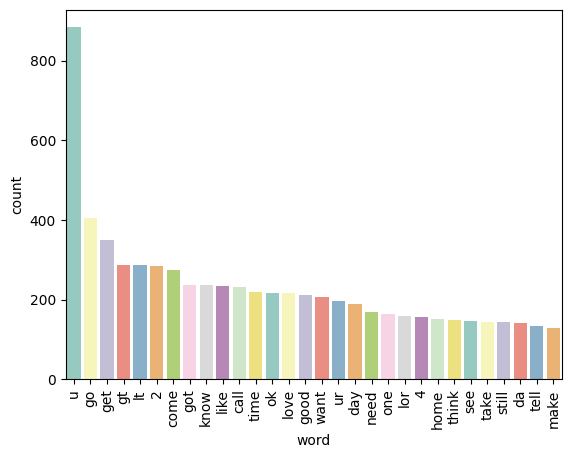

In [98]:
ham_counts = pd.DataFrame(Counter(ham_words).most_common(30), columns=['word', 'count'])
palette = sns.color_palette("Set3", n_colors=len(ham_counts))  # Adjust n_colors for the number of words

# Create the bar plot
sns.barplot(x='word', y='count', hue='word', data=ham_counts, palette=palette, legend=False)
plt.xticks(rotation='vertical')
plt.show()